In [ ]:
!pip install deepd3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.0/961.0 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 92.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 109.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.7 MB/s eta 0:00:00


In [ ]:
# Neural network libraries
import tensorflow as tf
from tensorflow.keras.optimizers import Adam


# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

# DeepD3
from deepd3.model import DeepD3_Model
from deepd3.training.stream import DataGeneratorStream

In [ ]:
import numpy as np
import cv2
import tifffile as tif

def resize_dataset(dataset_path, output_path, new_size):
  """Resizes a benchmark dataset that is a single image but stacks of images.

  Args:
    dataset_path: The path to the dataset.
    output_path: The path to the output dataset.
    new_size: The new size of the images.

  """

  images = tif.imread(dataset_path)
  resized_images = []
  for image in images:
    resized_image = cv2.resize(image, new_size)
    resized_images.append(resized_image)

  tif.imsave(output_path, resized_images)



if __name__ == "__main__":
  dataset_path = "/content/DeepD3_Benchmark (1).tif"
  output_path = "resized_dataset.npy"
  new_size = (128, 128)

  resize_dataset(dataset_path, output_path, new_size)


<ipython-input-6-2a9525294cd0>:21: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tif.imsave(output_path, resized_images)


In [ ]:
# !pip install rasterio
import rasterio

# Open the tif file
with rasterio.open('/content/resized_dataset.npy') as src:

  # Get the number of items in the tif file
  number_of_items = src.count

print(number_of_items)


1


In [ ]:
import tifffile

# Read the TIFF image
image = tifffile.imread('/content/resized_dataset.npy')

# Get the image shape
image_shape = image.shape

# Print the image shape
print(image_shape)


(71, 128, 128)


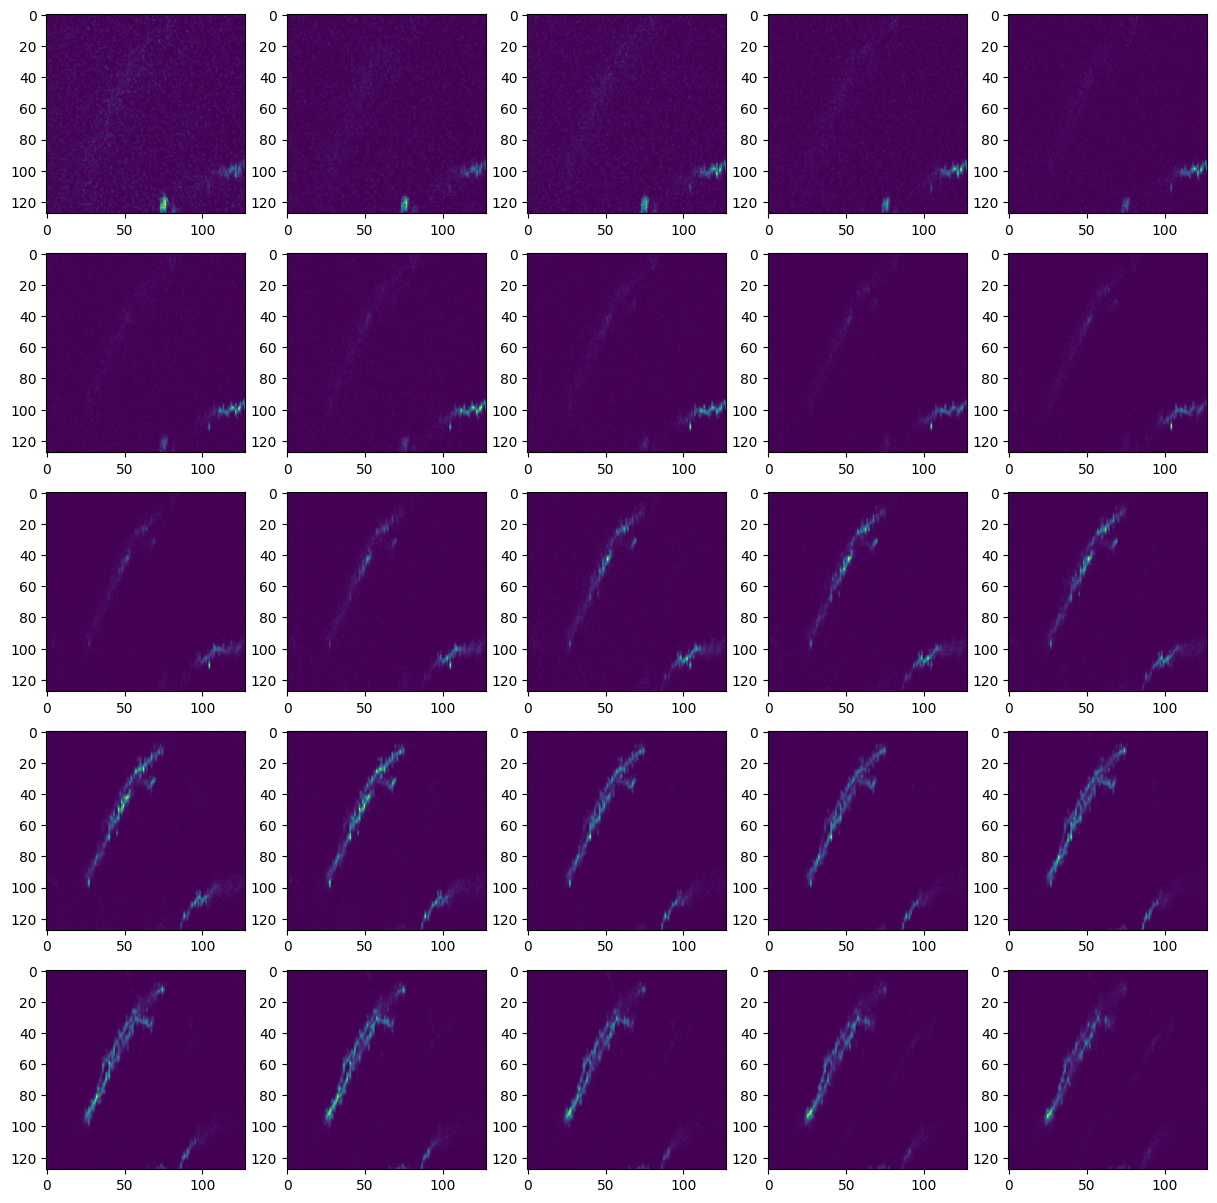

In [ ]:
import tifffile as tif
import matplotlib.pyplot as plt

def visualize_dataset(dataset_path):
  """Visualizes a benchmark dataset that is a single image but stacks of images.

  Args:
    dataset_path: The path to the dataset.

  """

  images = tif.imread(dataset_path)
  plt.figure(figsize=(15, 15))
  for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
  plt.show()

if __name__ == "__main__":
  dataset_path = "/content/resized_dataset.npy"

  visualize_dataset(dataset_path)


In [ ]:
# !pip install flammkuchen
import flammkuchen as fl
import numpy as np
from deepd3.core.analysis import Stack
from tensorflow.keras.models import load_model
pred_fn = "predictions.blosc"

# need to change the custom model bcoz of this model" is incompatible with the layer: expected shape=(None, 128, 128, 1), found shape=(None, 384, 1472, 1
# Specify the filepath to the saved model
model_fn = "/content/deepd3_custom_trained_model.h5"  # Replace with the actual filepath
# model_fn.summary()
# Load the model from the filepath
model = load_model(model_fn, compile=False)
# model.summary()
# Load the input data or stack
stack = Stack('/content/resized_dataset.npy')

stack.predictWholeImage(model_fn)

# Generate predictions using the loaded model
#predictions = model.predict(stack)

# Save the predictions
#fl.save('predictions.flam', {'predictions': predictions}, compression='blosc')
fl.save(pred_fn,
            dict(dendrites=stack.prediction[...,0].astype(np.float32),
                spines=stack.prediction[..., 1].astype(np.float32)),
                compression='blosc')


  0%|          | 0/71 [00:00<?, ?it/s]

1/1 [==============================] - 8s 8s/step


  1%|▏         | 1/71 [00:11<13:02, 11.17s/it]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 3/71 [00:11<03:20,  2.94s/it]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 5/71 [00:11<01:37,  1.47s/it]

1/1 [==============================] - 0s 40ms/step


 10%|▉         | 7/71 [00:11<00:56,  1.13it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 9/71 [00:11<00:36,  1.71it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▌        | 11/71 [00:12<00:24,  2.42it/s]

1/1 [==============================] - 0s 34ms/step


 18%|█▊        | 13/71 [00:12<00:17,  3.25it/s]

1/1 [==============================] - 0s 41ms/step


 21%|██        | 15/71 [00:12<00:13,  4.12it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 17/71 [00:12<00:10,  5.12it/s]

1/1 [==============================] - 0s 31ms/step


 27%|██▋       | 19/71 [00:12<00:08,  6.10it/s]

1/1 [==============================] - 0s 34ms/step


 30%|██▉       | 21/71 [00:12<00:07,  6.97it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 23/71 [00:13<00:06,  7.82it/s]

1/1 [==============================] - 0s 39ms/step


 35%|███▌      | 25/71 [00:13<00:05,  8.29it/s]

1/1 [==============================] - 0s 34ms/step


 38%|███▊      | 27/71 [00:13<00:04,  9.04it/s]

1/1 [==============================] - 0s 33ms/step


 41%|████      | 29/71 [00:13<00:04,  9.70it/s]

1/1 [==============================] - 0s 37ms/step


 44%|████▎     | 31/71 [00:13<00:04,  9.31it/s]

1/1 [==============================] - 0s 30ms/step


 46%|████▋     | 33/71 [00:14<00:03,  9.75it/s]

1/1 [==============================] - 0s 27ms/step


 49%|████▉     | 35/71 [00:14<00:03, 10.15it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 37/71 [00:14<00:02, 11.37it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 39/71 [00:14<00:02, 12.19it/s]

1/1 [==============================] - 0s 21ms/step


 58%|█████▊    | 41/71 [00:14<00:02, 13.04it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 43/71 [00:14<00:02, 13.72it/s]

1/1 [==============================] - 0s 20ms/step


 63%|██████▎   | 45/71 [00:14<00:01, 14.01it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▌   | 47/71 [00:15<00:01, 13.58it/s]

1/1 [==============================] - 0s 21ms/step


 69%|██████▉   | 49/71 [00:15<00:01, 13.68it/s]

1/1 [==============================] - 0s 22ms/step


 72%|███████▏  | 51/71 [00:15<00:01, 13.63it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 53/71 [00:15<00:01, 13.95it/s]

1/1 [==============================] - 0s 21ms/step


 77%|███████▋  | 55/71 [00:15<00:01, 14.18it/s]

1/1 [==============================] - 0s 21ms/step


 80%|████████  | 57/71 [00:15<00:00, 14.43it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 59/71 [00:15<00:00, 14.65it/s]

1/1 [==============================] - 0s 21ms/step


 86%|████████▌ | 61/71 [00:16<00:00, 14.49it/s]

1/1 [==============================] - 0s 20ms/step


 89%|████████▊ | 63/71 [00:16<00:00, 14.45it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 65/71 [00:16<00:00, 14.18it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 67/71 [00:16<00:00, 13.74it/s]

1/1 [==============================] - 0s 21ms/step


 97%|█████████▋| 69/71 [00:16<00:00, 14.01it/s]

1/1 [==============================] - 0s 21ms/step


100%|██████████| 71/71 [00:16<00:00,  4.23it/s]


In [ ]:
import blosc

def see_prediction(blosc_file):
  """Sees the prediction in a blosc file.

  Args:
    blosc_file: The path to the blosc file.

  """

  uncompressed_data = blosc.decompress(blosc_file)
  print(uncompressed_data)

if __name__ == "__main__":
  blosc_file = "/content/predictions.blosc"

  see_prediction(blosc_file)


TypeError: ignored

In [ ]:
!pip install numpy
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

# Open the TIFF image
image = Image.open('/content/output.tif')

# Convert the image to a NumPy array
image_array = np.array(image)

# Display the image
plt.imshow(image_array, cmap='gray')  # Use cmap='gray' for grayscale images
plt.axis('off')  # Remove axis ticks and labels
plt.show()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ValueError: ignored

In [ ]:
import numpy as np
from PyQt5.QtCore import QObject, pyqtSignal
import imageio as io
import flammkuchen as fl
import os
import cv2
from skimage.measure import find_contours, moments
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage.draw import disk
from tqdm import tqdm
import cc3d
from numba import njit
from deepd3.core.dendrite import sphere
from scipy.ndimage import grey_closing, binary_dilation, label as labelImage, distance_transform_edt


In [ ]:
def _get_sorted_seeds(stack, threshold=0.8):
    """Sort seeds according to their highest prediction value

    Args:
        stack (numpy ndarray): The stack with the predictions
        threshold (float, optional): The threshold for being a seed pixel. Defaults to 0.8.

    Returns:
        numpy.ndarray: seed coordinates sorted by prediction value
    """
    coords = np.nonzero(stack>=threshold)
    intensities = stack[coords]
    # Highest peak first
    idx_maxsort = np.argsort(-intensities)
    coords = np.transpose(coords)[idx_maxsort]
    return coords

In [ ]:
def _distance_to_seed(seed, pos, delta_xy = 1, delta_z = 1):
    """Computes the euclidean distance between seed pixel and current position `pos`

    Args:
        seed (tuple): seed pixel coordinates (x,y,z)
        pos (tuple): current position coordinates (x,y,z)

    Returns:
        float: euclidean distance between seed and current position
    """
    a = (seed[0] * delta_xy - pos[0] * delta_xy)**2
    b = (seed[1] * delta_xy - pos[1] * delta_xy)**2
    c = (seed[2] * delta_z  - pos[2] * delta_z)**2

    return np.sqrt(a+b+c)

In [ ]:
def connected_components_3d(prediction, seeds, delta, threshold, distance, dimensions):
    """Computes connected components in 3D using various constraints.
    Each ROI is grown from a seed pixel. From there, in a 26-neighbour fashion more
    pixels are added iteratively. Each additional pixel needs to fulfill the following requirements:

    * The new pixel's intensity needs to be in a given range relative to the seed intensity (`delta`)
    * The new pixel's intensity needs to be above a given `threshold`
    * The new pixel's position needs to be in the vicinity (`distance`) of the seed pixel

    Each pixel can only be assigned to one ROI once.

    Args:
        prediction (numpy.ndarray): prediction from deep neural network
        seeds (numpy.ndarray): seed pixels
        delta (float): difference to seed pixel intensity
        threshold (float): threshold for pixel intensity
        distance (int or float): maximum euclidean distance in microns to seed pixel
        dimensions (dict(float, float)): xy and z pitch in microns

    Returns:
        tuple(labels, N): the labelled stack and the number of found ROIs
    """
    # Initialize everything as background
    im = np.zeros(prediction.shape, dtype=np.uint16)
    L = 1 # Start with label 1

    delta_xy = dimensions[0]
    delta_z  = dimensions[1]

    # Iterate through seed pixels
    for i in range(seeds.shape[0]):
        # Retrieve location and seed intensity
        x0, y0, z0 = seeds[i]
        t = prediction[x0, y0, z0]

        # Seed pixel has been assigned to a label already, skip
        if im[x0, y0, z0]:
            continue

        # Start with the floodfilling
        neighbours = [(x0, y0, z0)]

        while len(neighbours):
            # Look at next pixel
            x, y, z = neighbours.pop()

            # Current pixel not in stack
            if x >= im.shape[0] or x < 0:
                continue

            if y >= im.shape[1] or y < 0:
                continue

            if z >= im.shape[2] or z < 0:
                continue

            # Intensity at given point
            p0 = prediction[x, y, z]

            # A good pixel should be
            # - similar to the seed px (delta)
            # - intensity above a given threshold
            # - in label image it is still a background px
            # - distance to seed is lower than distance
            if abs(p0 - t) <= delta * t and \
                 p0 > threshold and \
                 im[x, y, z] == 0 and \
                 _distance_to_seed((x0, y0, z0), (x,y,z), delta_xy, delta_z) < distance:

                # Assign pixel current label
                im[x,y,z] = L

                # Look at neighbours
                neighbours.extend(_neighbours(x,y,z))

        # Finished with this label
        L += 1

    return im, L-1

In [ ]:
class ROI3D_Creator(QObject):
    zSignal = pyqtSignal(int, int)
    log = pyqtSignal(str)

    def __init__(self, dendrite_prediction, spine_prediction, mode='floodfill', areaThreshold=0.25,
        peakThreshold=0.8, seedDelta=0.1, distanceToSeed=10, dimensions=dict(xy=0.094, z=0.5)):
        """3D ROI Creator.

        Given the arguments, 3D ROIs are built dynamically from dendrite and spine prediction.

        Args:
            dendrite_prediction (numpy.ndarray): dendrite prediction probability stack
            spine_prediction (numpy.ndarray): spine prediction probability stack
            mode (str, optional): Mode for building 3D rois (floodfill or connected components). Defaults to 'floodfill'.
            areaThreshold (float, optional): Area threshold for floodfilling and connected components. Defaults to 0.25.
            peakThreshold (float, optional): Peak threshold for finding seed points. Defaults to 0.8.
            seedDelta (float, optional): Difference to seed in terms of relative probability. Defaults to 0.1.
            distanceToSeed (int, optional): Distance to seed px in micrometer. Defaults to 10.
            dimensions (dict, optional): Dimensions in xy and z in in micrometer. Defaults to dict(xy=0.094, z=0.5).
        """

        super().__init__()
        self.dendrite_prediction = dendrite_prediction
        self.spine_prediction = spine_prediction
        self.mode = mode # floodfill or thresholded
        self.areaThreshold = areaThreshold
        self.peakThreshold = peakThreshold
        self.seedDelta = seedDelta
        self.distanceToSeed = distanceToSeed
        self.dimensions = dimensions
        self.roi_map = np.zeros_like(spine_prediction, dtype=np.int32)
        self.rois = {}

        self.computeContours = True

    def create(self, minPx, maxPx, minPlanes, applyWatershed=False, dilation=0):
        """Create 3D ROIs

        Args:
            minPx (int): only retain 3D ROIs containing at least `minPx` pixels
            maxPx (int): only retain 3D ROIs containing at most `maxPx` pixels
            minPlanes (int): only retain 3D ROIs spanning at least `minPlanes` planes
            applyWatershed (bool, optional): Apply watershed algorithm to divide ROIs. Defaults to False.
            dilation (int, optional): Dilate dendrite probability map. Defaults to 0.

        Returns:
            int: number of retained ROIs
        """
        ROI_id = 0

        # Find raw labels
        self.log.emit("Create labels")

        if self.mode == 'floodfill':
            # Find all potential seed pixels that are at least at peakThreshold
            seeds = _get_sorted_seeds(self.spine_prediction, self.peakThreshold)

            # Generate all labels using custom 3D connected components
            labels, N = connected_components_3d(self.spine_prediction,
                seeds,
                self.seedDelta,
                self.areaThreshold,
                self.distanceToSeed,
                (self.dimensions['xy'], self.dimensions['z']))

        else:
            thresholded_im = self.spine_prediction > self.areaThreshold

            if dilation > 0:
                thresholded_im = binary_dilation(thresholded_im, np.ones((3,3,3)), iterations=dilation)

            labels, N = cc3d.connected_components(thresholded_im, return_N=True)

        if applyWatershed:
            D = distance_transform_edt(labels > 0)
            # Seed generation
            localMax = peak_local_max(D, indices=False, min_distance=0, footprint=np.ones((3,3,3)), exclude_border=1)

            markers = labelImage(localMax, structure=np.ones((3,3,3)))[0]

                                        ### data # seeds   # eliminate noise
            labels = watershed(-D, markers, mask=labels > 0)

         # Apply region growing algorithm to each label
        self.log.emit("Apply region growing")
        regions = {}
        for ROI_id in np.unique(labels):
            if ROI_id == 0:
                continue

            # Grow the region from a random seed in the ROI.
            region = region_growing(labels, ROI_id, self.areaThreshold)

            # Add the region to the dictionary.
            regions[ROI_id] = region

        # Create the ROIs.
        rois = []
        for ROI_id, region in regions.items():
            rois.append({
                'ROI_id': ROI_id,
                'region': region
            })

        self.rois = rois

        self.log.emit("Compute meta data")
        # Compute raw centroids, check size and plane span of ROIs
        cs, px, planes = centroids3D_from_labels(labels)
        planes = planes.sum(1)


        self.log.emit("Clean ROIs")
        # Find ROIs that do not match the criteria
        criteria_mismatch = (planes < minPlanes) | (px < minPx) | (px > maxPx)
        rois_to_delete = np.where(criteria_mismatch)[0]

        self.log.emit(f"Removing {len(rois_to_delete)} ROIs...")

        self.log.emit("Clean labels")
        # Clean all labels
        labels = cleanLabels(labels, rois_to_delete)
        labels = reid(labels)

        # Re-compute information
        cs, px, planes = centroids3D_from_labels(labels)
        planes = planes.sum(1)

        # Compute the centroids again after cleaning the labels
        centroids = cs/px[:, None]

        self.roi_centroids = centroids

        if self.computeContours:

            self.log.emit("Compute contours and create plane-wise slices")
            for z in tqdm(range(self.spine_prediction.shape[0])):
                self.rois[z] = []
                labels_plane = labels[z]

                # Compute contours...
                for ROI_id in np.unique(labels_plane):
                    if ROI_id == 0:
                        continue

                    c = find_contours(labels_plane==ROI_id)
                    self.rois[z].append({
                        'ROI_id': ROI_id,
                        'contour': c[0],
                        'centroid': np.asarray(centroids[ROI_id])
                    })

                # Talk to progress bar
                self.zSignal.emit(z, self.spine_prediction.shape[0])

        self.roi_map = labels
        self.log.emit("Done.")
        return np.max(labels)

In [ ]:
def _neighbours(x,y,z):
    """Generates 26-connected neighbours

    Args:
        x (int): x-value
        y (int): y-value
        z (int): z-value

    Returns:
        list: neighbour indices of a given point (x,y,z)
    """
    look = []

    for i in range(x-1, x+2):
        for j in range(y-1, y+2):
            for k in range(z-1, z+2):
                if not (i == x and j == y and k == z):
                    look.append((i,j,k))

    return look

In [ ]:
def centroids3D_from_labels(labels):
    """Computes the centroid for each label in an 3D stack containing image labels.
    0 is background, 1...N are foreground labels.
    This function uses image moments to compute the centroid.

    Args:
        labels (numpy.ndarray): ROI labeled image (0...N)

    Returns:
        tuple(numpy.ndarray, numpy.ndarray, numpy.ndarray):
            Returns first-order moments, zero-order moments and covered planes
    """
    N = np.max(labels)
    # First-order moments for z, y, and x
    cs = np.zeros((N+1, 3), dtype=np.float32)
    # Zero-order moment (area/mass of label)
    px = np.zeros(N+1, dtype=np.float32)
    # Coverage of planes (ROIs x z-planes)
    planes = np.zeros((N+1, labels.shape[0]), dtype=np.int32)

    # Fast for-loops using numba
    for i in range(labels.shape[0]):
        for j in range(labels.shape[1]):
            for k in range(labels.shape[2]):
                l = labels[i,j,k]
                cs[l, 0] += i # M 1,0,0
                cs[l, 1] += j # M 0,1,0
                cs[l, 2] += k # M 0,0,1
                px[l] += 1    # M 0,0,0
                planes[l,i] = 1 # plane coverage

    return cs, px, planes

In [ ]:
def cleanLabels(labels, rois_to_delete):
    """Cleans labels from label stack. Set labels in rois_to_delete to background.

    Args:
        labels ([type]): [description]
        rois_to_delete ([type]): [description]

    Returns:
        [type]: [description]
    """
    clean_labels = np.zeros(labels.shape, dtype=np.int32)

    # Iterate through stack
    for i in range(labels.shape[0]):
        for j in range(labels.shape[1]):
            for k in range(labels.shape[2]):
                l = labels[i,j,k]

                # If it is background label, go on
                if l == 0:
                    continue

                # Not background label, check if label should remain
                if (rois_to_delete==l).sum() > 0:
                    clean_labels[i,j,k] = 0

                else:
                    clean_labels[i,j,k] = l

    return clean_labels

In [ ]:
def reid(labels):
    """Relabel an existing label map to ensure continuous label ids

    Args:
        labels (numpy.ndarray): original label map

    Returns:
        numpy.ndarray: re-computed label map
    """
    ls = np.unique(labels)

    new_labels = np.zeros(labels.shape, dtype=np.int32)

    for i in range(labels.shape[0]):
        for j in range(labels.shape[1]):
            for k in range(labels.shape[2]):
                l = labels[i,j,k]

                if l == 0:
                    continue

                else:
                    new_labels[i,j,k] = np.argmax(ls==l)

    return new_labels

In [ ]:
def centroids3D_from_labels(labels):
    """Computes the centroid for each label in an 3D stack containing image labels.
    0 is background, 1...N are foreground labels.
    This function uses image moments to compute the centroid.

    Args:
        labels (numpy.ndarray): ROI labeled image (0...N)

    Returns:
        tuple(numpy.ndarray, numpy.ndarray, numpy.ndarray):
            Returns first-order moments, zero-order moments and covered planes
    """
    N = np.max(labels)
    # First-order moments for z, y, and x
    cs = np.zeros((N+1, 3), dtype=np.float32)
    # Zero-order moment (area/mass of label)
    px = np.zeros(N+1, dtype=np.float32)
    # Coverage of planes (ROIs x z-planes)
    planes = np.zeros((N+1, labels.shape[0]), dtype=np.int32)

    # Fast for-loops using numba
    for i in range(labels.shape[0]):
        for j in range(labels.shape[1]):
            for k in range(labels.shape[2]):
                l = labels[i,j,k]
                cs[l, 0] += i # M 1,0,0
                cs[l, 1] += j # M 0,1,0
                cs[l, 2] += k # M 0,0,1
                px[l] += 1    # M 0,0,0
                planes[l,i] = 1 # plane coverage

    return cs, px, planes

In [ ]:
def region_growing(labels, seed_pixel_id, area_threshold):
    """
    This function grows a region from a seed pixel in an image.

    Args:
        labels: A NumPy array that represents the image.
        seed_pixel_id: The index of a seed pixel in the image.
        area_threshold: The minimum area of a region.

    Returns:
        A list of pixels that are included in the region.
    """

    # Check the seed pixel.
    if seed_pixel_id < 0 or seed_pixel_id >= labels.size:
        raise IndexError("Seed pixel is out of bounds.")

    # Initialize the region.
    region = [seed_pixel_id]

    # Grow the region until no more pixels can be added.
    while len(region) > 0:
        current_pixel = region.pop()

        # Get the neighbors of the current pixel.
        neighbors = get_neighbors(current_pixel, labels.shape)

        # For each neighbor, if it has a probability greater than the threshold and it is not already in the region, add it to the region.
        for neighbor in neighbors:
            if labels[neighbor] >= area_threshold and neighbor not in region:
                # Change the labels of the pixels in the region.
                labels[neighbor] = ROI_id
                region.append(neighbor)

    # Return the region.
    return region

In [ ]:
def get_neighbors(pixel_id, shape):
    """
    This function gets the neighbors of a pixel in an image.

    Args:
        pixel_id: The index of a pixel in the image.
        shape: The shape of the image.

    Returns:
        A list of the neighbors of the pixel.
    """

    # Get the coordinates of the pixel.
    x, y, z = pixel_id // shape[0], (pixel_id % shape[0]) // shape[1], pixel_id % shape[1]

    # Get the neighbors of the pixel.
    neighbors = []
    for dx in range(-1, 2):
        for dy in range(-1, 2):
            for dz in range(-1, 2):
                if dx == 0 and dy == 0 and dz == 0:
                    continue

                neighbor_id = x + dx * shape[0] + dy * shape[1] + dz * shape[2]
                if 0 <= neighbor_id < shape[0] * shape[1] * shape[2]:
                    neighbors.append(neighbor_id)

    return neighbors

In [ ]:
# Building 3D ROIs


rois_fn = "rois.blosc"

r = ROI3D_Creator(stack.prediction[..., 0],
            stack.prediction[..., 1],
            mode='floodfill', areaThreshold=0.25,
        peakThreshold=0.8, seedDelta=0.1, distanceToSeed=10, dimensions=dict(xy=0.094, z=0.5))

r.create(1,
            1390,
            3)

print("Saving ROIs...")
fl.save(rois_fn,
                dict(rois=r.rois, roi_map=r.roi_map),
                compression='blosc')

ValueError: ignored